In [7]:
import pandas
import matplotlib.pyplot as plt


=== USER MOBILITY TRACES ===
User_1. Mobility Logs: [[0, 0], [1, 1], [3, 1], [5, 1], [3, 1], [2, 0], [1, 1], [0, 2], [1, 1], [0, 0], [2, 0]]
User_2. Mobility Logs: [[2, 2], [2, 2], [2, 2], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [4, 2], [4, 2]]



=== EDGE SERVERS' POWER CONSUMPTION ===
EdgeServer_1. Power Consumption per Step: [11.0, 20.9, 30.8, 40.7, 50.6, 60.5, 70.4, 80.3, 90.2, 100.1, 110.0]
EdgeServer_2. Power Consumption per Step: [0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0]


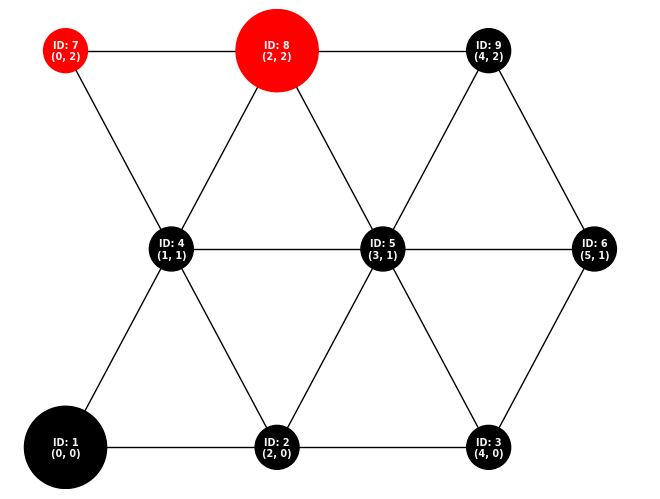

In [2]:
################################
#### EdgeSimPy (Simulation) ####
################################
try:
    # Importing EdgeSimPy components and its built-in libraries (NetworkX and MessagePack)
    from edge_sim_py import *
    import networkx as nx
    import msgpack

except ModuleNotFoundError:
    # Downloading EdgeSimPy binaries from GitHub (the "-q" parameter suppresses Pip's output. You check the full logs by removing it)
    print("hek")
    # Importing EdgeSimPy components and its built-in libraries (NetworkX and MessagePack)
    from edge_sim_py import *
    import networkx as nx
    import msgpack


################################################
#### Matplotlib (Interactive Visualization) ####
################################################
try:
    # Importing Matplotlib
    import matplotlib.pyplot as plt

except ModuleNotFoundError:
    # Downloading Matplotlib
    print("hek")
    
    # Importing Matplotlib
    import matplotlib.pyplot as plt


##############################
#### Pandas (Log Parsing) ####
##############################
try:
    # Downloading Pandas
    import pandas as pd

except ModuleNotFoundError:
    # Downloading Pandas
    print("hek")
    
    # Importing Pandas
    import pandas as pd


##################################
#### Python's Default Modules ####
##################################
import os
import random

# Defining a seed value to enable reproducible outcomes
random.seed(1)


map_coordinates = hexagonal_grid(x_size=3, y_size=3)

for coordinates in map_coordinates:
    # Creating the base station object
    base_station = BaseStation()
    base_station.wireless_delay = 0
    base_station.coordinates = coordinates

    # Creating network switch object using the "sample_switch()" generator
    network_switch = sample_switch()
    base_station._connect_to_network_switch(network_switch=network_switch)



partially_connected_hexagonal_mesh(
    network_nodes=NetworkSwitch.all(),
    link_specifications=[
        {"number_of_objects": 16, "delay": 1, "bandwidth": 10},
    ],
)

edge_server = EdgeServer()

# Computational capacity (CPU in cores, RAM memory in megabytes, and disk in megabytes)
edge_server.cpu = 10
edge_server.memory = 4096
edge_server.disk = 102400

# Power-related attributes
edge_server.power_model_parameters = {
    "max_power_consumption": 110,
    "static_power_percentage": 0.1,
}

# Specifying the edge server's power model
edge_server.power_model = LinearServerPowerModel

# Connecting the edge server to a random base station with no attached edge server
base_stations_without_servers = [base_station for base_station in BaseStation.all() if len(base_station.edge_servers) == 0]
base_station = random.choice(base_stations_without_servers)
base_station._connect_to_edge_server(edge_server=edge_server)



class MyCustomPowerModel:
    @classmethod
    def get_power_consumption(cls, device: object):
        # Please notice that this sample code could be replaced by any other routine
        power_consumption = device.cpu_demand * device.power_model_parameters["alpha"]

        # It's important to always return the calculated device's power consumption
        return power_consumption

edge_server = EdgeServer()

# Computational capacity (CPU in cores, RAM memory in megabytes, and disk in megabytes)
edge_server.cpu = 10
edge_server.memory = 4096
edge_server.disk = 102400

# Power-related attributes
edge_server.power_model_parameters = {
    "alpha": 2,
}

# Specifying the edge server's power model
edge_server.power_model = MyCustomPowerModel

# Connecting the edge server to a random base station with no attached edge server
base_stations_without_servers = [base_station for base_station in BaseStation.all() if len(base_station.edge_servers) == 0]
base_station = random.choice(base_stations_without_servers)
base_station._connect_to_edge_server(edge_server=edge_server)

user = User()
user.mobility_model = pathway
user._set_initial_position(coordinates=random.choice(map_coordinates))

def my_custom_mobility_model(user: object):
    # Gathering the user's mobility model parameters. If no parameter was specified, set "beta" as 1
    if hasattr(user, 'mobility_model_parameters') and "beta" in user.mobility_model_parameters:
        parameters = user.mobility_model_parameters
    else:
        parameters = {"beta": 1}

    # Moving the user to random coordinates. We find the set of coordinates
    # through base stations, as base stations are the entities responsible
    # for providing wireless connectivity for users, being present in all
    # map coordinates. Thus, let's find a random base station
    random_base_station = user.base_station
    while random_base_station == user.base_station:
        random_base_station = random.choice(BaseStation.all())
    
    # Setting the user's coordinates trace to the random base station position and
    # instructing EdgeSimPy that the user will stay in that position for "beta" time steps
    new_coordinates = [random_base_station.coordinates for _ in range(parameters["beta"])]
    user.coordinates_trace.extend(new_coordinates)

user = User()
user.mobility_model = my_custom_mobility_model
user.mobility_model_parameters = {"beta": 3}
user._set_initial_position(coordinates=random.choice(map_coordinates), number_of_replicates=user.mobility_model_parameters["beta"])

# Customizing network visualization
positions = {}
labels = {}
sizes = []
colors = []
for node in Topology.first().nodes():
    positions[node] = node.coordinates
    labels[node] = f"ID: {node.id}\n{node.coordinates}"
    
    if len(node.base_station.users) > 0:
        sizes.append(3500)
    else:
        sizes.append(1000)
    
    if len(node.base_station.edge_servers) > 0:
        colors.append("red")
    else:
        colors.append("black")

# Drawing the network topology
nx.draw(
    Topology.first(),
    pos=positions,
    node_color=colors,
    node_size=sizes,
    labels=labels,
    font_size=7,
    font_weight="bold",
    font_color="whitesmoke",
)



dataset = ComponentManager.export_scenario(save_to_file=True, file_name="sample_dataset")



def cool_resource_management_policy(parameters: dict):
    current_time_step = parameters["current_step"]
    for edge_server in EdgeServer.all():
        edge_server.cpu_demand = current_time_step

# Instantiating the simulator
simulator = Simulator(
    dump_interval=5,
    tick_unit="minutes",
    tick_duration=1,
    stopping_criterion=lambda model: model.schedule.steps == 10,
    resource_management_algorithm=cool_resource_management_policy,
    user_defined_functions=[MyCustomPowerModel, my_custom_mobility_model]
)

# Loading our dataset
simulator.initialize(input_file="datasets/sample_dataset.json")

# Running the simulation
simulator.run_model()



pd.options.display.max_columns = 1000
pd.options.display.max_rows = 5000
pd.options.display.max_colwidth = 199
pd.options.display.width = 1000


def highlight_rows(dataframe):
    df = dataframe.copy()

    mask = df['Time Step'] % 2 == 0

    df.loc[mask, :] = 'background-color: #222222; color: white'
    df.loc[~mask, :] = 'background-color: #333333; color: white'

    return df

# Gathering the list of msgpack files in the current directory
logs_directory = f"{os.getcwd()}/logs"
dataset_files = [file for file in os.listdir(logs_directory) if ".msgpack" in file]

# Reading msgpack files found
datasets = {}
for file in dataset_files:
    with open(f"logs/{file}", "rb") as data_file:
        datasets[file.replace(".msgpack", "")] = pd.DataFrame(msgpack.unpackb(data_file.read(), strict_map_key=False))



datasets["EdgeServer"].style.apply(highlight_rows, axis=None)

datasets["User"].style.apply(highlight_rows, axis=None)



print("=== USER MOBILITY TRACES ===")
users_coordinates = dict(datasets["User"].groupby('Object')['Coordinates'].apply(list))
for user, mobility_logs in users_coordinates.items():
    print(f"{user}. Mobility Logs: {mobility_logs}")

print("\n\n")

print("=== EDGE SERVERS' POWER CONSUMPTION ===")
edge_servers_power_consumption = dict(datasets["EdgeServer"].groupby('Object')['Power Consumption'].apply(list))
for edge_server, power_consumption in edge_servers_power_consumption.items():
    print(f"{edge_server}. Power Consumption per Step: {power_consumption}")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


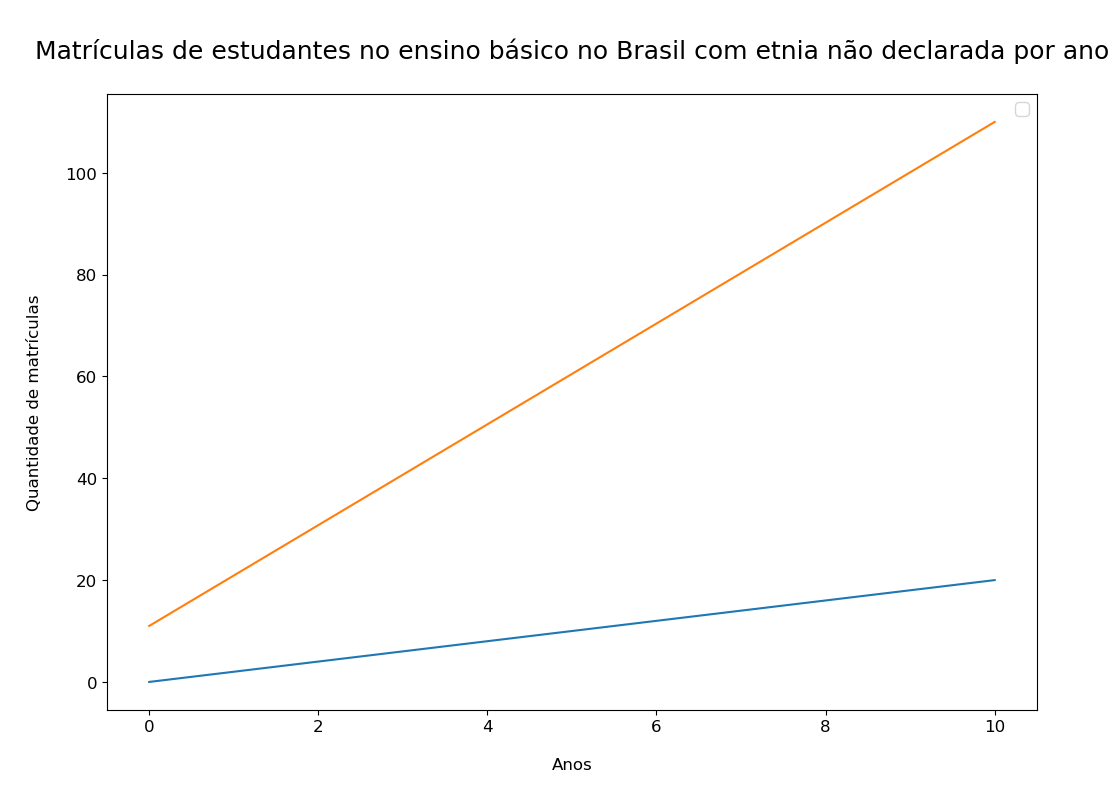

In [11]:
plt.figure(figsize=(12, 8))


plt.plot(edge_servers_power_consumption['EdgeServer_2'])
plt.plot(edge_servers_power_consumption['EdgeServer_1'])

plt.ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('\nAnos\n', fontsize = 12)
plt.ylabel('\nQuantidade de matrículas\n', fontsize = 12)
plt.legend(fontsize = 12)
plt.title('\nMatrículas de estudantes no ensino básico no Brasil com etnia não declarada por ano\n', fontsize = 18)
plt.show()

In [3]:
edge_servers_power_consumption.keys()

dict_keys(['EdgeServer_1', 'EdgeServer_2'])

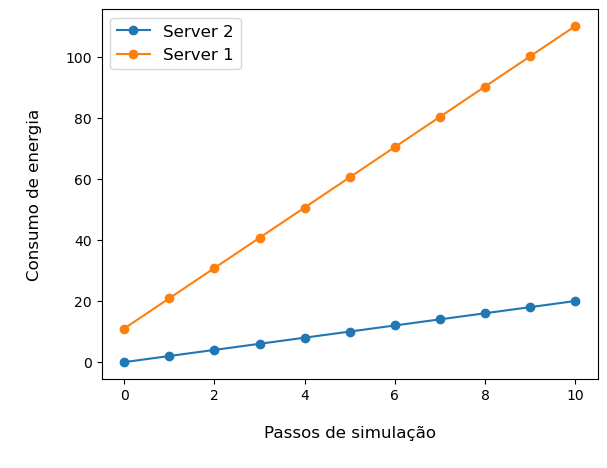

In [10]:
plt.plot(edge_servers_power_consumption['EdgeServer_2'],label = 'Server 2', marker = 'o')
plt.plot(edge_servers_power_consumption['EdgeServer_1'],label = 'Server 1', marker = 'o')
altura_ajustada = 0.03


plt.text(f'{edge_servers_power_consumption['EdgeServer_2']:.2f}', ha='center', va='bottom', fontsize=12)
plt.text(edge_servers_power_consumption['EdgeServer_2'] + altura_ajustada, f'{lista_dados_fundamental_mil[i]:.2f}', ha='center', va='bottom', fontsize=12)
plt.xlabel('\nPassos de simulação\n', fontsize = 12)
plt.ylabel('\nConsumo de energia\n', fontsize = 12)
plt.legend(fontsize = 12)